<a href="https://colab.research.google.com/github/Max-JI64/Kakao_Tech_Bootcamp/blob/main/Daily_class/25_10_23_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 활성화 함수

## 시그모이드

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

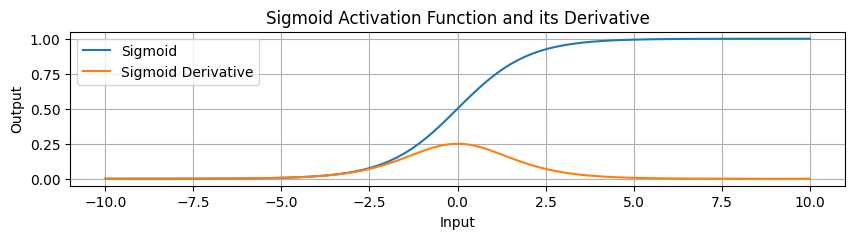

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

y_derivative = sigmoid_derivative(x)

plt.figure(figsize=(10, 2))

plt.plot(x, y, label='Sigmoid')
plt.plot(x, y_derivative, label='Sigmoid Derivative')
plt.title('Sigmoid Activation Function and its Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()


## 하이퍼볼릭 탄젠트

In [ ]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

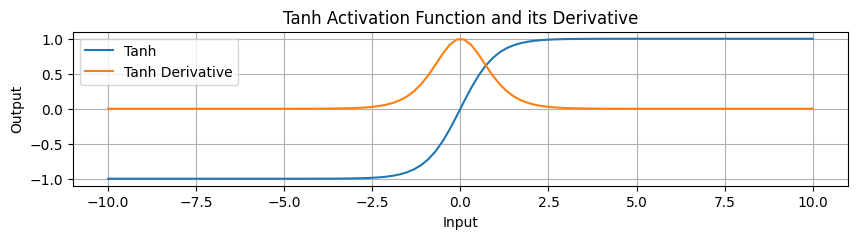

In [ ]:
# Plotting tanh and its derivative
x = np.linspace(-10, 10, 100)
y = tanh(x)
y_derivative = tanh_derivative(x)
plt.figure(figsize=(10, 2))
plt.plot(x, y, label='Tanh')
plt.plot(x, y_derivative, label='Tanh Derivative')
plt.title('Tanh Activation Function and its Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid()
plt.show()


## 렐루

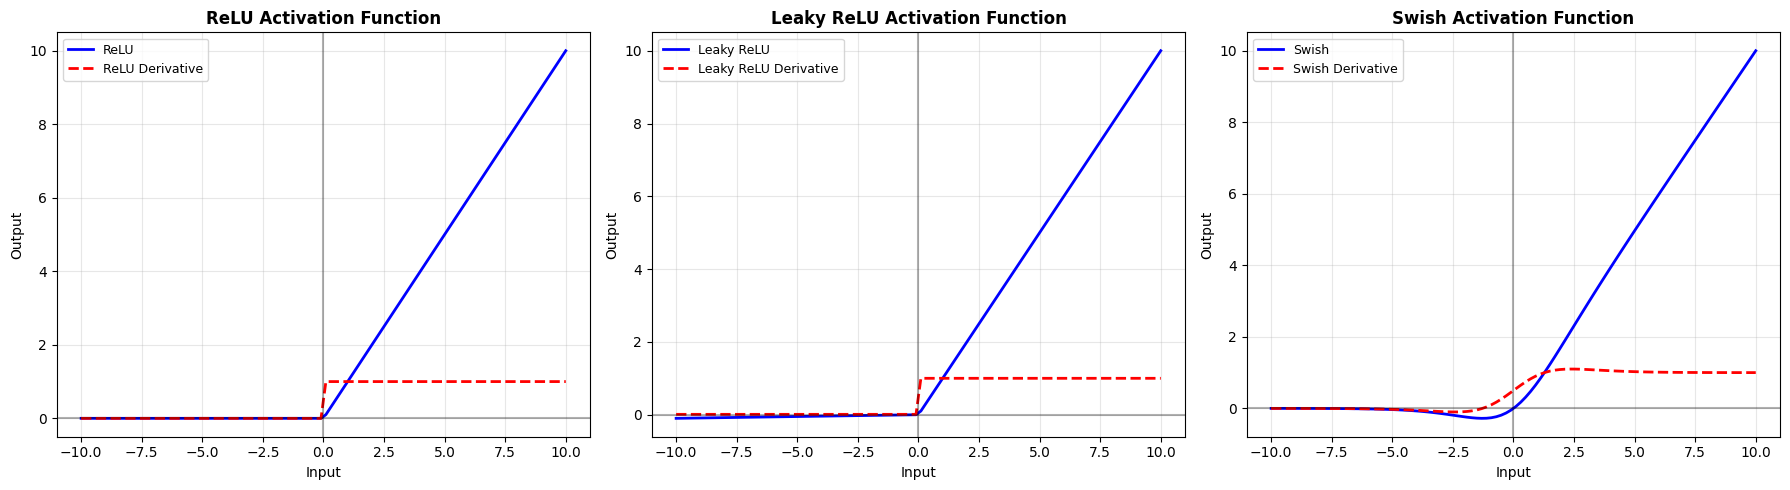

In [ ]:
# Define activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def swish(x, beta=1):
    return x * sigmoid(beta * x)

def swish_derivative(x, beta=1):
    s = sigmoid(beta * x)
    return s + beta * x * s * (1 - s)

# Generate data
x = np.linspace(-10, 10, 100)

# Create 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ReLU plot
y_relu = relu(x)
y_relu_derivative = relu_derivative(x)
axes[0].plot(x, y_relu, 'b-', linewidth=2, label='ReLU')
axes[0].plot(x, y_relu_derivative, 'r--', linewidth=2, label='ReLU Derivative')
axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[0].set_title('ReLU Activation Function', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Input', fontsize=10)
axes[0].set_ylabel('Output', fontsize=10)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Leaky ReLU plot
y_leaky = leaky_relu(x)
y_leaky_derivative = leaky_relu_derivative(x)
axes[1].plot(x, y_leaky, 'b-', linewidth=2, label='Leaky ReLU')
axes[1].plot(x, y_leaky_derivative, 'r--', linewidth=2, label='Leaky ReLU Derivative')
axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1].set_title('Leaky ReLU Activation Function', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Input', fontsize=10)
axes[1].set_ylabel('Output', fontsize=10)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

# Swish plot
y_swish = swish(x)
y_swish_derivative = swish_derivative(x)
axes[2].plot(x, y_swish, 'b-', linewidth=2, label='Swish')
axes[2].plot(x, y_swish_derivative, 'r--', linewidth=2, label='Swish Derivative')
axes[2].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[2].set_title('Swish Activation Function', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Input', fontsize=10)
axes[2].set_ylabel('Output', fontsize=10)
axes[2].legend(fontsize=9)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 역전파

## 역전파 경사하강법

Iteration 1: Loss = 8.4233, w = 0.9867
Iteration 2: Loss = 2.3960, w = 1.4596
Iteration 3: Loss = 0.6815, w = 1.7118
Iteration 4: Loss = 0.1939, w = 1.8463
Iteration 5: Loss = 0.0551, w = 1.9180
Iteration 6: Loss = 0.0157, w = 1.9563
Iteration 7: Loss = 0.0045, w = 1.9767
Iteration 8: Loss = 0.0013, w = 1.9876
Iteration 9: Loss = 0.0004, w = 1.9934
Iteration 10: Loss = 0.0001, w = 1.9965


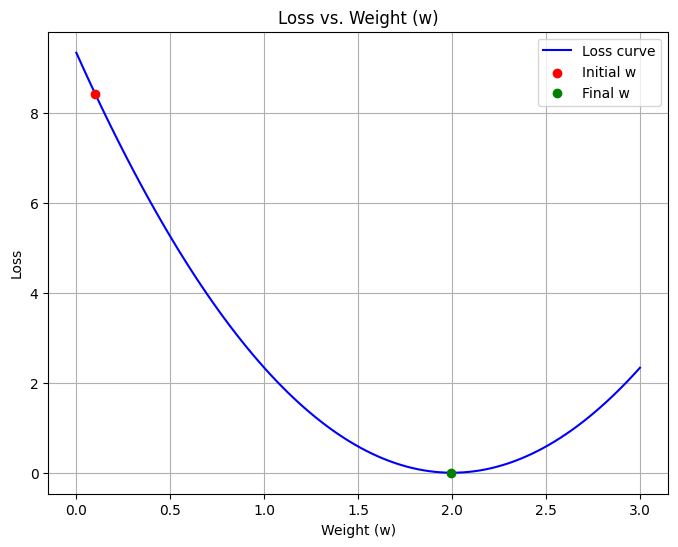

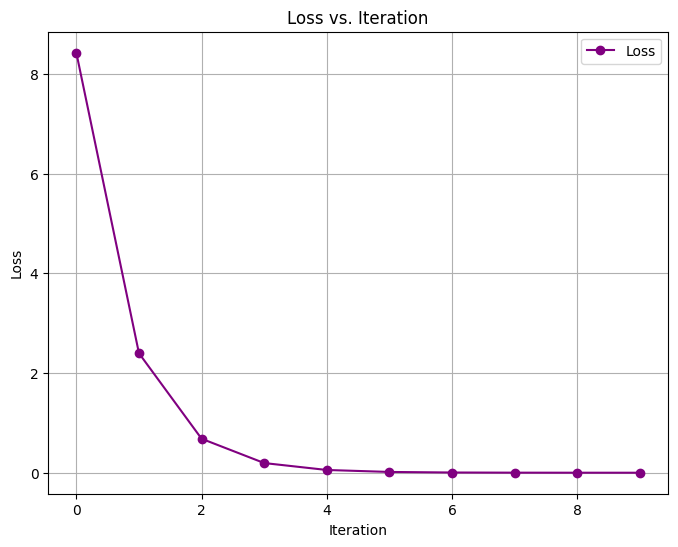

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([1, 2, 3])
Y = np.array([2, 4, 6])

# Adjustable parameters
w = 0.1  # Initial weight
eta = 0.1  # Learning rate
n = len(X)  # Number of data points
num_iterations = 10  # Number of iterations

# Forward pass: Compute predictions and loss
def compute_predictions(X, w):
    return w * X

def compute_loss(Y_hat, Y):
    return (1 / (2 * n)) * np.sum((Y_hat - Y) ** 2)

# Backpropagation: Compute gradient
def compute_gradient(X, Y, Y_hat):
    dw = (1 / n) * np.sum((Y_hat - Y) * X)
    return dw

# Store loss and weight history
loss_history = []
w_history = [w]

# Perform gradient descent
for iteration in range(num_iterations):
    Y_hat = compute_predictions(X, w)
    loss = compute_loss(Y_hat, Y)
    loss_history.append(loss)
    dw = compute_gradient(X, Y, Y_hat)
    w = w - eta * dw
    w_history.append(w)
    print(f"Iteration {iteration + 1}: Loss = {loss:.4f}, w = {w:.4f}")

# Compute loss for a range of w values for visualization
w_range = np.linspace(0, 3, 100)
losses = [compute_loss(compute_predictions(X, w_val), Y) for w_val in w_range]

# Plot 1: Loss vs. Weight (w)
plt.figure(figsize=(8, 6))
plt.plot(w_range, losses, label='Loss curve', color='blue')
plt.scatter([w_history[0]], [loss_history[0]], color='red', label='Initial w', zorder=5)
plt.scatter([w_history[-1]], [compute_loss(compute_predictions(X, w_history[-1]), Y)],
           color='green', label='Final w', zorder=5)
plt.xlabel('Weight (w)')
plt.ylabel('Loss')
plt.title('Loss vs. Weight (w)')
plt.legend()
plt.grid(True)
plt.savefig('loss_vs_w.png')
plt.show()

# Plot 2: Loss vs. Iteration
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), loss_history, marker='o', color='purple', label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.legend()
plt.grid(True)
plt.savefig('loss_vs_iteration.png')
plt.show()

Iteration 1: Loss = 1.4583, w = 1.3667, b = 0.6500
Iteration 2: Loss = 0.3238, w = 1.5322, b = 0.7117
Iteration 3: Loss = 0.0980, w = 1.6082, b = 0.7341
Iteration 4: Loss = 0.0524, w = 1.6442, b = 0.7390
Iteration 5: Loss = 0.0426, w = 1.6624, b = 0.7363
Iteration 6: Loss = 0.0399, w = 1.6727, b = 0.7302
Iteration 7: Loss = 0.0386, w = 1.6794, b = 0.7226
Iteration 8: Loss = 0.0376, w = 1.6845, b = 0.7144
Iteration 9: Loss = 0.0367, w = 1.6888, b = 0.7061
Iteration 10: Loss = 0.0358, w = 1.6928, b = 0.6977


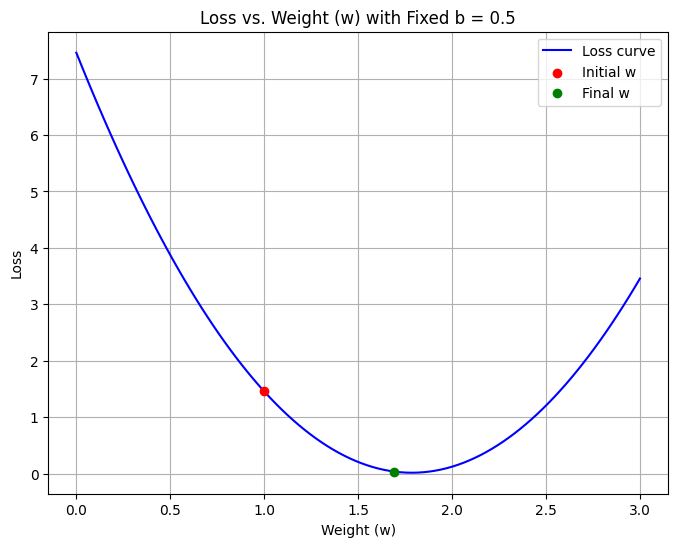

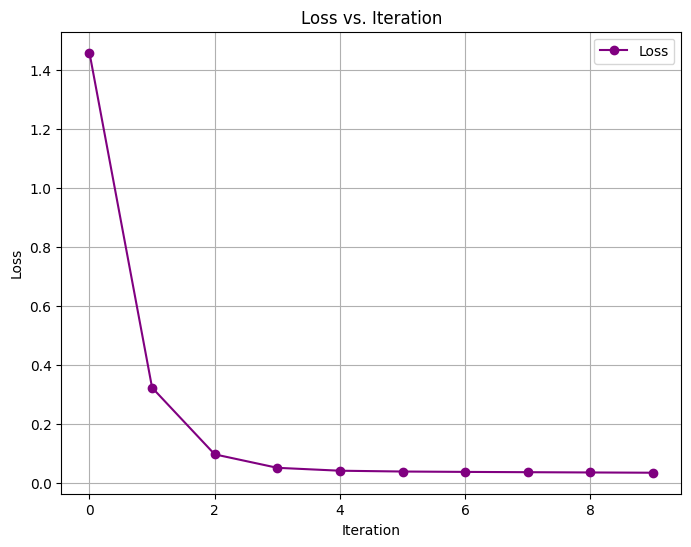

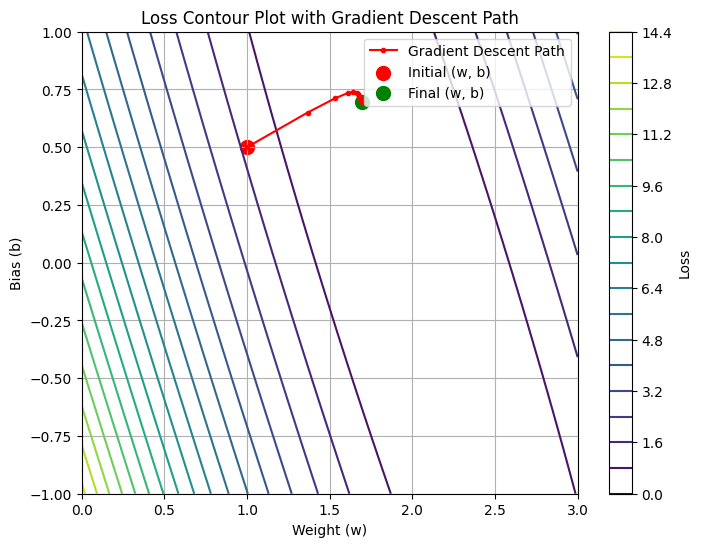

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([1, 2, 3])
Y = np.array([2, 4, 6])

# Adjustable parameters
w = 1.0  # Initial weight
b = 0.5  # Initial bias
eta = 0.1  # Learning rate
n = len(X)  # Number of data points
num_iterations = 10  # Number of iterations

# Forward pass: Compute predictions and loss
def compute_predictions(X, w, b):
    return w * X + b

def compute_loss(Y_hat, Y):
    return (1 / (2 * n)) * np.sum((Y_hat - Y) ** 2)

# Backpropagation: Compute gradients
def compute_gradients(X, Y, Y_hat):
    dw = (1 / n) * np.sum((Y_hat - Y) * X)
    db = (1 / n) * np.sum(Y_hat - Y)
    return dw, db

# Store loss and parameter history
loss_history = []
w_history = [w]
b_history = [b]

# Perform gradient descent
for iteration in range(num_iterations):
    Y_hat = compute_predictions(X, w, b)
    loss = compute_loss(Y_hat, Y)
    loss_history.append(loss)
    dw, db = compute_gradients(X, Y, Y_hat)
    w = w - eta * dw
    b = b - eta * db
    w_history.append(w)
    b_history.append(b)
    print(f"Iteration {iteration + 1}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

# Compute loss for a range of w values (fixed b = 0.5)
w_range = np.linspace(0, 3, 100)
losses_w = [compute_loss(compute_predictions(X, w_val, 0.5), Y) for w_val in w_range]

# Plot 1: Loss vs. Weight (w) with fixed b = 0.5
plt.figure(figsize=(8, 6))
plt.plot(w_range, losses_w, label='Loss curve', color='blue')
plt.scatter([w_history[0]], [loss_history[0]], color='red', label='Initial w', zorder=5)
plt.scatter([w_history[-1]], [compute_loss(compute_predictions(X, w_history[-1], 0.5), Y)],
           color='green', label='Final w', zorder=5)
plt.xlabel('Weight (w)')
plt.ylabel('Loss')
plt.title('Loss vs. Weight (w) with Fixed b = 0.5')
plt.legend()
plt.grid(True)
plt.savefig('loss_vs_w.png')
plt.show()

# Plot 2: Loss vs. Iteration
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), loss_history, marker='o', color='purple', label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.legend()
plt.grid(True)
plt.savefig('loss_vs_iteration.png')
plt.show()

# Compute loss for contour plot
w_range = np.linspace(0, 3, 100)
b_range = np.linspace(-1, 1, 100)
W, B = np.meshgrid(w_range, b_range)
losses = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Y_hat = compute_predictions(X, W[i, j], B[i, j])
        losses[i, j] = compute_loss(Y_hat, Y)

# Plot 3: Contour plot of Loss vs. w and b
plt.figure(figsize=(8, 6))
contours = plt.contour(W, B, losses, levels=20, cmap='viridis')
plt.plot(w_history, b_history, 'r.-', label='Gradient Descent Path')
plt.scatter([w_history[0]], [b_history[0]], color='red', s=100, label='Initial (w, b)')
plt.scatter([w_history[-1]], [b_history[-1]], color='green', s=100, label='Final (w, b)')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Loss Contour Plot with Gradient Descent Path')
plt.colorbar(contours, label='Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_contour.png')
plt.show()

Iteration 1: Loss = 6.1250, w1 = 0.5733, w2 = 0.7000, b = 0.5283
Iteration 2: Loss = 2.3798, w1 = 0.6187, w2 = 0.8245, b = 0.5456
Iteration 3: Loss = 0.9310, w1 = 0.6466, w2 = 0.9022, b = 0.5559
Iteration 4: Loss = 0.3704, w1 = 0.6637, w2 = 0.9506, b = 0.5620
Iteration 5: Loss = 0.1535, w1 = 0.6741, w2 = 0.9809, b = 0.5654
Iteration 6: Loss = 0.0695, w1 = 0.6803, w2 = 0.9998, b = 0.5672
Iteration 7: Loss = 0.0369, w1 = 0.6839, w2 = 1.0118, b = 0.5679
Iteration 8: Loss = 0.0242, w1 = 0.6859, w2 = 1.0194, b = 0.5680
Iteration 9: Loss = 0.0192, w1 = 0.6869, w2 = 1.0242, b = 0.5677
Iteration 10: Loss = 0.0171, w1 = 0.6872, w2 = 1.0274, b = 0.5672


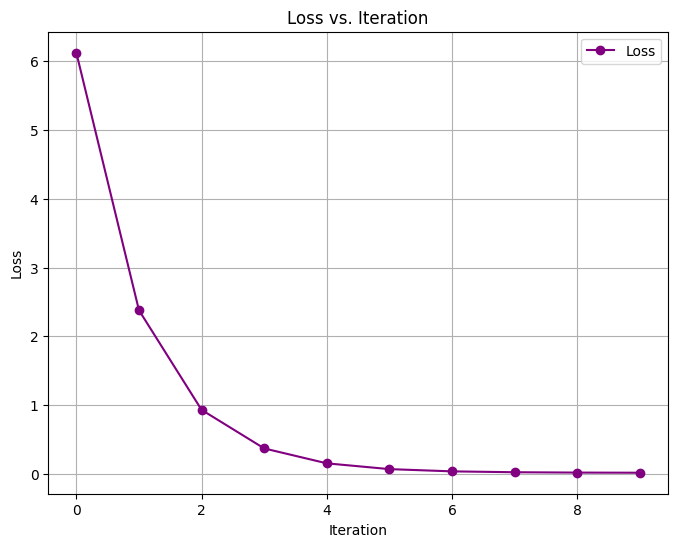

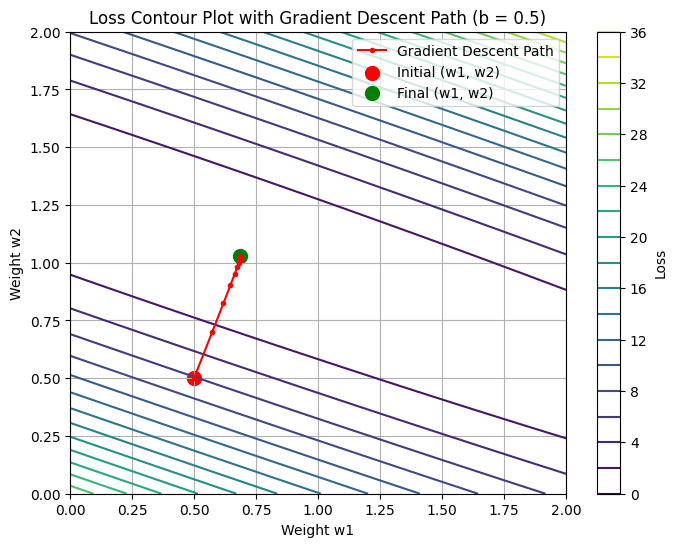

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset: Two features
X = np.array([[1, 1], [2, 4], [3, 9]])  # x_i1 = x_i, x_i2 = x_i^2
Y = np.array([2, 6, 12])  # y_i = x_i1 + x_i2

# Adjustable parameters
w1 = 0.5  # Initial weight 1
w2 = 0.5  # Initial weight 2
b = 0.5   # Initial bias
eta = 0.01  # Learning rate
n = len(Y)  # Number of data points
num_iterations = 10  # Number of iterations

# Forward pass: Compute predictions and loss
def compute_predictions(X, w1, w2, b):
    return w1 * X[:, 0] + w2 * X[:, 1] + b

def compute_loss(Y_hat, Y):
    return (1 / (2 * n)) * np.sum((Y_hat - Y) ** 2)

# Backpropagation: Compute gradients
def compute_gradients(X, Y, Y_hat):
    dw1 = (1 / n) * np.sum((Y_hat - Y) * X[:, 0])
    dw2 = (1 / n) * np.sum((Y_hat - Y) * X[:, 1])
    db = (1 / n) * np.sum(Y_hat - Y)
    return dw1, dw2, db

# Store loss and parameter history
loss_history = []
w1_history = [w1]
w2_history = [w2]
b_history = [b]

# Perform gradient descent
for iteration in range(num_iterations):
    Y_hat = compute_predictions(X, w1, w2, b)
    loss = compute_loss(Y_hat, Y)
    loss_history.append(loss)
    dw1, dw2, db = compute_gradients(X, Y, Y_hat)
    w1 = w1 - eta * dw1
    w2 = w2 - eta * dw2
    b = b - eta * db
    w1_history.append(w1)
    w2_history.append(w2)
    b_history.append(b)
    print(f"Iteration {iteration + 1}: Loss = {loss:.4f}, w1 = {w1:.4f}, w2 = {w2:.4f}, b = {b:.4f}")

# Compute loss for contour plot (fixed b = 0.5)
w1_range = np.linspace(0, 2, 100)
w2_range = np.linspace(0, 2, 100)
W1, W2 = np.meshgrid(w1_range, w2_range)
losses = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Y_hat = compute_predictions(X, W1[i, j], W2[i, j], 0.5)
        losses[i, j] = compute_loss(Y_hat, Y)

# Plot 1: Loss vs. Iteration
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), loss_history, marker='o', color='purple', label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.legend()
plt.grid(True)
plt.savefig('loss_vs_iteration.png')
plt.show()

# Plot 2: Contour plot of Loss vs. w1 and w2
plt.figure(figsize=(8, 6))
contours = plt.contour(W1, W2, losses, levels=20, cmap='viridis')
plt.plot(w1_history, w2_history, 'r.-', label='Gradient Descent Path')
plt.scatter([w1_history[0]], [w2_history[0]], color='red', s=100, label='Initial (w1, w2)')
plt.scatter([w1_history[-1]], [w2_history[-1]], color='green', s=100, label='Final (w1, w2)')
plt.xlabel('Weight w1')
plt.ylabel('Weight w2')
plt.title('Loss Contour Plot with Gradient Descent Path (b = 0.5)')
plt.colorbar(contours, label='Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_contour.png')
plt.show()

Iteration  1: Loss = 6.1250, w1 = 0.5733, w2 = 0.7000, b = 0.5283
Iteration  2: Loss = 2.3798, w1 = 0.6187, w2 = 0.8245, b = 0.5456
Iteration  3: Loss = 0.9310, w1 = 0.6466, w2 = 0.9022, b = 0.5559
Iteration  4: Loss = 0.3704, w1 = 0.6637, w2 = 0.9506, b = 0.5620
Iteration  5: Loss = 0.1535, w1 = 0.6741, w2 = 0.9809, b = 0.5654
Iteration  6: Loss = 0.0695, w1 = 0.6803, w2 = 0.9998, b = 0.5672
Iteration  7: Loss = 0.0369, w1 = 0.6839, w2 = 1.0118, b = 0.5679
Iteration  8: Loss = 0.0242, w1 = 0.6859, w2 = 1.0194, b = 0.5680
Iteration  9: Loss = 0.0192, w1 = 0.6869, w2 = 1.0242, b = 0.5677
Iteration 10: Loss = 0.0171, w1 = 0.6872, w2 = 1.0274, b = 0.5672


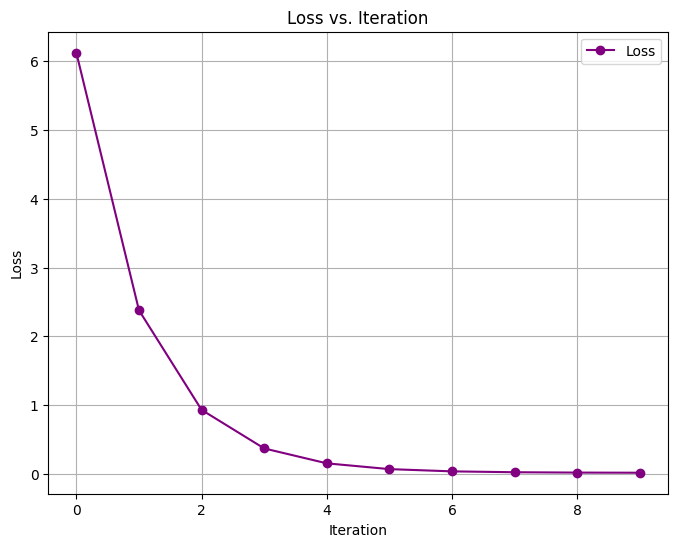

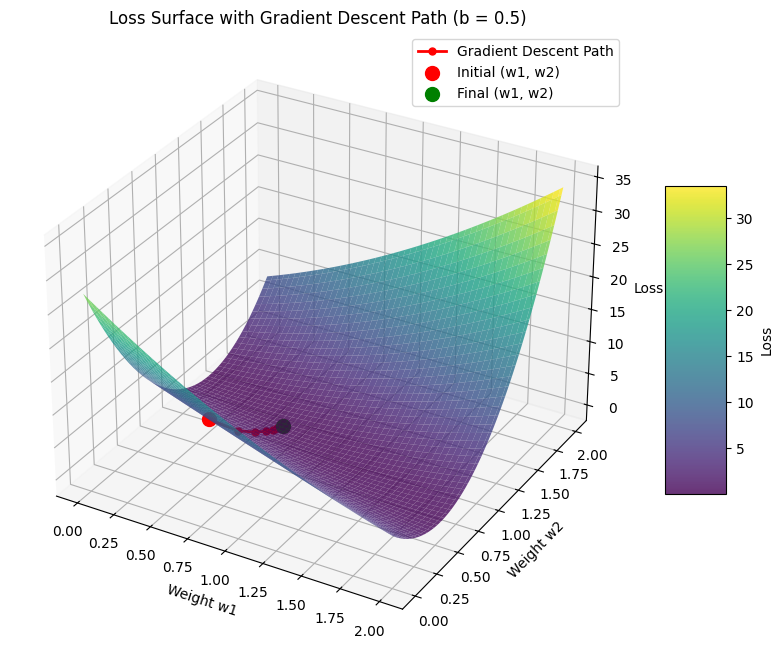

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dataset: Two features
X = np.array([[1, 1], [2, 4], [3, 9]])  # x_i1 = x_i, x_i2 = x_i^2
Y = np.array([2, 6, 12])  # y_i = x_i1 + x_i2

# Adjustable parameters
w1 = 0.5  # Initial weight 1
w2 = 0.5  # Initial weight 2
b = 0.5   # Initial bias
eta = 0.01  # Learning rate
n = len(Y)  # Number of data points
num_iterations = 10  # Number of iterations

# Forward pass: Compute predictions and loss
def compute_predictions(X, w1, w2, b):
    return w1 * X[:, 0] + w2 * X[:, 1] + b

def compute_loss(Y_hat, Y):
    return (1 / (2 * n)) * np.sum((Y_hat - Y) ** 2)

# Backpropagation: Compute gradients
def compute_gradients(X, Y, Y_hat):
    dw1 = (1 / n) * np.sum((Y_hat - Y) * X[:, 0])
    dw2 = (1 / n) * np.sum((Y_hat - Y) * X[:, 1])
    db = (1 / n) * np.sum(Y_hat - Y)
    return dw1, dw2, db

# Store loss and parameter history
loss_history = []
w1_history = [w1]
w2_history = [w2]
b_history = [b]

# Perform gradient descent
for iteration in range(num_iterations):

    Y_hat = compute_predictions(X, w1, w2, b)

    loss = compute_loss(Y_hat, Y)
    loss_history.append(loss)

    dw1, dw2, db = compute_gradients(X, Y, Y_hat)
    w1 = w1 - eta * dw1
    w2 = w2 - eta * dw2
    b = b - eta * db

    w1_history.append(w1)
    w2_history.append(w2)
    b_history.append(b)

    print(f"Iteration {iteration + 1:2d}: Loss = {loss:.4f}, w1 = {w1:.4f}, w2 = {w2:.4f}, b = {b:.4f}")

# Compute loss for 3D surface plot (fixed b = 0.5)
w1_range = np.linspace(0, 2, 100)
w2_range = np.linspace(0, 2, 100)
W1, W2 = np.meshgrid(w1_range, w2_range)
losses = np.zeros_like(W1)
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        Y_hat = compute_predictions(X, W1[i, j], W2[i, j], 0.5)
        losses[i, j] = compute_loss(Y_hat, Y)

# Plot 1: Loss vs. Iteration
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), loss_history, marker='o', color='purple', label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.legend()
plt.grid(True)
plt.savefig('loss_vs_iteration.png')
plt.show()

# Plot 2: 3D Surface Plot of Loss vs. w1 and w2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W1, W2, losses, cmap='viridis', alpha=0.8)
ax.plot(w1_history, w2_history, [compute_loss(compute_predictions(X, w1, w2, 0.5), Y) for w1, w2 in zip(w1_history, w2_history)],
        'r.-', label='Gradient Descent Path', linewidth=2, markersize=10)
ax.scatter([w1_history[0]], [w2_history[0]], [loss_history[0]], color='red', s=100, label='Initial (w1, w2)')
ax.scatter([w1_history[-1]], [w2_history[-1]], [compute_loss(compute_predictions(X, w1_history[-1], w2_history[-1], 0.5), Y)],
           color='green', s=100, label='Final (w1, w2)')
ax.set_xlabel('Weight w1')
ax.set_ylabel('Weight w2')
ax.set_zlabel('Loss')
ax.set_title('Loss Surface with Gradient Descent Path (b = 0.5)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Loss')
ax.legend()
plt.savefig('loss_3d_surface.png')
plt.show()

# Vanishing and Exploding Gradient

## 기울기 소실 문제

활성화 함수의 기울기가 1보다 작아, 네트워크가 깊어질수록 학습 과정에서 기울기가 계속 곱해져 지수적으로 감소한다.

  - **Gradient Clipping**: Cap the gradient magnitude during backpropagation (e.g., if gradient norm exceeds a threshold like 1, scale it down).
  - **Weight Initialization**: Use techniques like Xavier or He initialization to start with appropriately scaled weights.
  - **Learning Rate Scheduling**: Adjust the learning rate dynamically to prevent overshooting.
  - **Batch Normalization**: Normalize layer inputs to stabilize gradient flow.


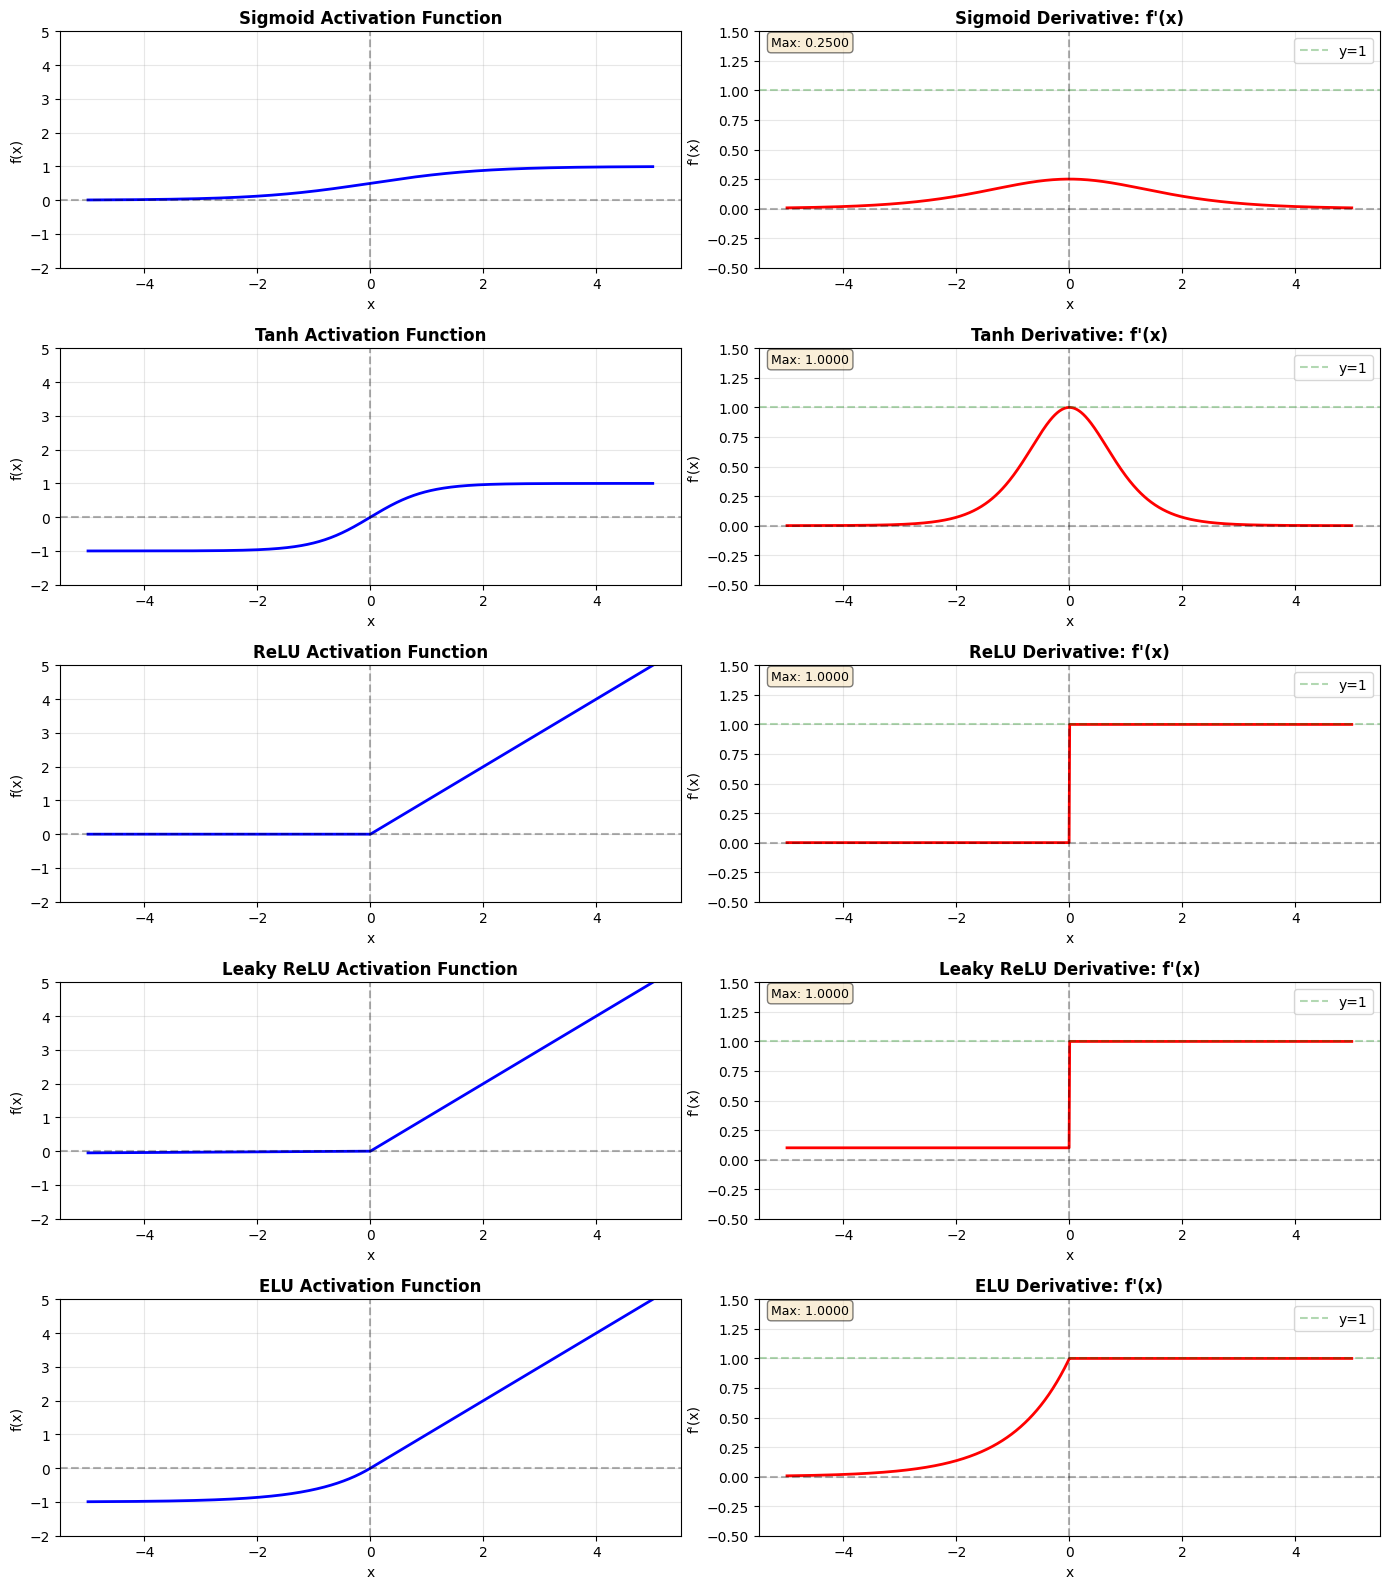

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Define derivatives
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu_derivative(x):
    return (x > 0).astype(float)

def leaky_relu_derivative(x, alpha=0.1):
    return np.where(x > 0, 1, alpha)

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

# Generate x values
x = np.linspace(-5, 5, 1000)

# Create figure with subplots
fig, axes = plt.subplots(5, 2, figsize=(14, 16))

activations = [
    ('Sigmoid', sigmoid, sigmoid_derivative),
    ('Tanh', tanh, tanh_derivative),
    ('ReLU', relu, relu_derivative),
    ('Leaky ReLU', leaky_relu, leaky_relu_derivative),
    ('ELU', elu, elu_derivative)
]

for idx, (name, func, deriv) in enumerate(activations):
    # Activation function
    ax1 = axes[idx, 0]
    y = func(x)
    ax1.plot(x, y, 'b-', linewidth=2)
    ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    ax1.grid(True, alpha=0.3)
    ax1.set_title(f'{name} Activation Function', fontsize=12, fontweight='bold')
    ax1.set_xlabel('x', fontsize=10)
    ax1.set_ylabel('f(x)', fontsize=10)
    ax1.set_ylim(-2, 5)

    # Derivative
    ax2 = axes[idx, 1]
    y_deriv = deriv(x)
    ax2.plot(x, y_deriv, 'r-', linewidth=2)
    ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    ax2.axhline(y=1, color='g', linestyle='--', alpha=0.3, label='y=1')
    ax2.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    ax2.grid(True, alpha=0.3)
    ax2.set_title(f"{name} Derivative: f'(x)", fontsize=12, fontweight='bold')
    ax2.set_xlabel('x', fontsize=10)
    ax2.set_ylabel("f'(x)", fontsize=10)
    ax2.set_ylim(-0.5, 1.5)
    ax2.legend()

    # Add max derivative value annotation
    max_deriv = np.max(y_deriv)
    ax2.text(0.02, 0.98, f'Max: {max_deriv:.4f}',
             transform=ax2.transAxes, fontsize=9,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [ ]:
# Comparison of derivative values at different points
print("=" * 70)
print("Derivative Values Comparison (Vanishing Gradient Analysis)")
print("=" * 70)

test_points = [-2, -1, 0, 1, 2]

print(f"\n{'x':<6} {'Sigmoid':<12} {'Tanh':<12} {'ReLU':<12} {'Leaky ReLU':<12} {'ELU':<12}")
print("-" * 70)

for x_val in test_points:
    sig_d = sigmoid_derivative(np.array([x_val]))[0]
    tanh_d = tanh_derivative(np.array([x_val]))[0]
    relu_d = relu_derivative(np.array([x_val]))[0]
    leaky_d = leaky_relu_derivative(np.array([x_val]))[0]
    elu_d = elu_derivative(np.array([x_val]))[0]

    print(f"{x_val:<6} {sig_d:<12.4f} {tanh_d:<12.4f} {relu_d:<12.4f} {leaky_d:<12.4f} {elu_d:<12.4f}")

print("\n" + "=" * 70)
print("Gradient propagation simulation in a 10-layer deep network")
print("=" * 70)

layers = 10
x_test = 1.0  # positive input

# Sigmoid
grad_sigmoid = sigmoid_derivative(np.array([x_test]))[0] ** layers
print(f"\nSigmoid (x={x_test}): (0.25)^{layers} ≈ {grad_sigmoid:.2e}")

# Tanh
grad_tanh = tanh_derivative(np.array([x_test]))[0] ** layers
print(f"Tanh (x={x_test}): (0.42)^{layers} ≈ {grad_tanh:.2e}")

# ReLU
grad_relu = relu_derivative(np.array([x_test]))[0] ** layers
print(f"ReLU (x={x_test}): (1.0)^{layers} = {grad_relu:.2e}")

print("\nVanishing Gradient:")
print("- Sigmoid: gradient almost vanishes to zero")
print("- Tanh: gradient decreases but is better than sigmoid")
print("- ReLU: gradient is preserved! (remains at 1.0)")

Derivative Values Comparison (Vanishing Gradient Analysis)

x      Sigmoid      Tanh         ReLU         Leaky ReLU   ELU         
----------------------------------------------------------------------
-2     0.1050       0.0707       0.0000       0.1000       0.1353      
-1     0.1966       0.4200       0.0000       0.1000       0.3679      
0      0.2500       1.0000       0.0000       0.1000       1.0000      
1      0.1966       0.4200       1.0000       1.0000       1.0000      
2      0.1050       0.0707       1.0000       1.0000       1.0000      

Gradient propagation simulation in a 10-layer deep network

Sigmoid (x=1.0): (0.25)^10 ≈ 8.63e-08
Tanh (x=1.0): (0.42)^10 ≈ 1.71e-04
ReLU (x=1.0): (1.0)^10 = 1.00e+00

Vanishing Gradient:
- Sigmoid: gradient almost vanishes to zero
- Tanh: gradient decreases but is better than sigmoid
- ReLU: gradient is preserved! (remains at 1.0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a deep neural network with manual backpropagation
np.random.seed(42)

def simulate_gradient_flow(n_layers, activation_derivative_value, weight_scale=1.0):
    """
    Simulate gradient flow through a deep network

    Args:
        n_layers: Number of layers
        activation_derivative_value: Derivative of activation function (e.g., 0.25 for sigmoid)
        weight_scale: Scale of weight initialization

    Returns:
        List of gradient magnitudes at each layer
    """
    gradient = 1.0  # Start with gradient from loss
    gradients = [gradient]

    for i in range(n_layers):
        # Gradient = previous_gradient × activation_derivative × weight
        weight = np.random.randn() * weight_scale
        gradient = gradient * activation_derivative_value * weight
        gradients.append(abs(gradient))

    return gradients

# Test different scenarios
n_layers = 20

# 1. Vanishing Gradient (Sigmoid with small derivatives)
print("=" * 70)
print("VANISHING GRADIENT PROBLEM")
print("=" * 70)
sigmoid_max_derivative = 0.25
gradients_vanishing = simulate_gradient_flow(n_layers, sigmoid_max_derivative, weight_scale=1.0)

print(f"\nUsing Sigmoid activation (max derivative = {sigmoid_max_derivative})")
print(f"Initial gradient: {gradients_vanishing[0]:.6f}")
print(f"Gradient at layer 5: {gradients_vanishing[5]:.6e}")
print(f"Gradient at layer 10: {gradients_vanishing[10]:.6e}")
print(f"Gradient at layer 20: {gradients_vanishing[20]:.6e}")
print(f"\n Gradient shrinks to ~{gradients_vanishing[-1]:.2e} - nearly zero!")

# 2. Better flow with ReLU
print("\n" + "=" * 70)
print("BETTER GRADIENT FLOW (ReLU)")
print("=" * 70)
relu_derivative = 1.0
gradients_relu = simulate_gradient_flow(n_layers, relu_derivative, weight_scale=1.0)

print(f"\nUsing ReLU activation (derivative = {relu_derivative})")
print(f"Initial gradient: {gradients_relu[0]:.6f}")
print(f"Gradient at layer 5: {gradients_relu[5]:.6e}")
print(f"Gradient at layer 10: {gradients_relu[10]:.6e}")
print(f"Gradient at layer 20: {gradients_relu[20]:.6e}")
print(f"\n✓ Gradient maintains reasonable magnitude: {gradients_relu[-1]:.2e}")

# 3. Exploding Gradient (Large weight initialization)
print("\n" + "=" * 70)
print("EXPLODING GRADIENT PROBLEM")
print("=" * 70)
gradients_exploding = simulate_gradient_flow(n_layers, relu_derivative, weight_scale=2.0)

print(f"\nUsing ReLU with large weights (scale = 2.0)")
print(f"Initial gradient: {gradients_exploding[0]:.6f}")
print(f"Gradient at layer 5: {gradients_exploding[5]:.6e}")
print(f"Gradient at layer 10: {gradients_exploding[10]:.6e}")
print(f"Gradient at layer 20: {gradients_exploding[20]:.6e}")
print(f"\n Gradient explodes to {gradients_exploding[-1]:.2e} - unstable!")

VANISHING GRADIENT PROBLEM

Using Sigmoid activation (max derivative = 0.25)
Initial gradient: 1.000000
Gradient at layer 5: 1.549144e-05
Gradient at layer 10: 1.093462e-09
Gradient at layer 20: 4.124748e-17

 Gradient shrinks to ~4.12e-17 - nearly zero!

BETTER GRADIENT FLOW (ReLU)

Using ReLU activation (derivative = 1.0)
Initial gradient: 1.000000
Gradient at layer 5: 1.733149e-02
Gradient at layer 10: 1.456492e-04
Gradient at layer 20: 2.490549e-07

✓ Gradient maintains reasonable magnitude: 2.49e-07

EXPLODING GRADIENT PROBLEM

Using ReLU with large weights (scale = 2.0)
Initial gradient: 1.000000
Gradient at layer 5: 2.084944e-01
Gradient at layer 10: 1.416795e+00
Gradient at layer 20: 6.036280e+00

 Gradient explodes to 6.04e+00 - unstable!


## 몬테카를로 시뮬레이션

기울기의 흐름을 나타냄

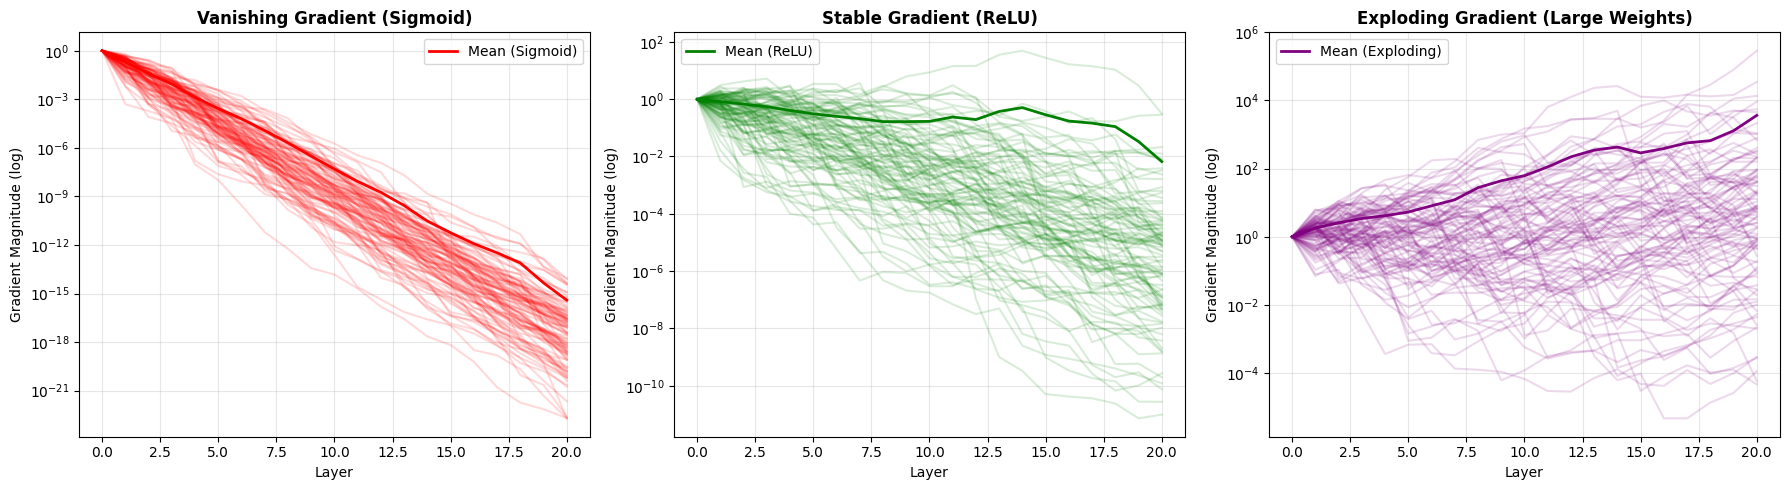

In [ ]:
# Monte Carlo simulation: visualize gradient flow over many random initializations
import numpy as np
import matplotlib.pyplot as plt

n_layers = 20
n_sim = 100  # Number of Monte Carlo runs
layers = list(range(n_layers + 1))

all_vanishing = []
all_relu = []
all_exploding = []

for _ in range(n_sim):
    # Vanishing: sigmoid max derivative, normal weights
    grads_vanishing = []
    gradient = 1.0
    for i in range(n_layers + 1):
        weight = np.random.randn() * 1.0
        gradient = gradient * 0.25 * weight if i > 0 else gradient
        grads_vanishing.append(abs(gradient))
    all_vanishing.append(grads_vanishing)
    # ReLU: good flow
    grads_relu = []
    gradient = 1.0
    for i in range(n_layers + 1):
        weight = np.random.randn() * 1.0
        gradient = gradient * 1.0 * weight if i > 0 else gradient
        grads_relu.append(abs(gradient))
    all_relu.append(grads_relu)
    # Exploding: large weights
    grads_exploding = []
    gradient = 1.0
    for i in range(n_layers + 1):
        weight = np.random.randn() * 2.0
        gradient = gradient * 1.0 * weight if i > 0 else gradient
        grads_exploding.append(abs(gradient))
    all_exploding.append(grads_exploding)

# Convert to arrays for easier plotting
all_vanishing = np.array(all_vanishing)
all_relu = np.array(all_relu)
all_exploding = np.array(all_exploding)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Monte Carlo traces
for i in range(n_sim):
    axes[0].plot(layers, all_vanishing[i], color='red', alpha=0.15)
    axes[1].plot(layers, all_relu[i], color='green', alpha=0.15)
    axes[2].plot(layers, all_exploding[i], color='purple', alpha=0.15)

# Plot mean trace
axes[0].plot(layers, np.mean(all_vanishing, axis=0), 'r-', linewidth=2, label='Mean (Sigmoid)')
axes[1].plot(layers, np.mean(all_relu, axis=0), 'g-', linewidth=2, label='Mean (ReLU)')
axes[2].plot(layers, np.mean(all_exploding, axis=0), 'purple', linewidth=2, label='Mean (Exploding)')

axes[0].set_yscale('log')
axes[0].set_title('Vanishing Gradient (Sigmoid)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Layer')
axes[0].set_ylabel('Gradient Magnitude (log)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].set_yscale('log')
axes[1].set_title('Stable Gradient (ReLU)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Layer')
axes[1].set_ylabel('Gradient Magnitude (log)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

axes[2].set_yscale('log')
axes[2].set_title('Exploding Gradient (Large Weights)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Layer')
axes[2].set_ylabel('Gradient Magnitude (log)')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

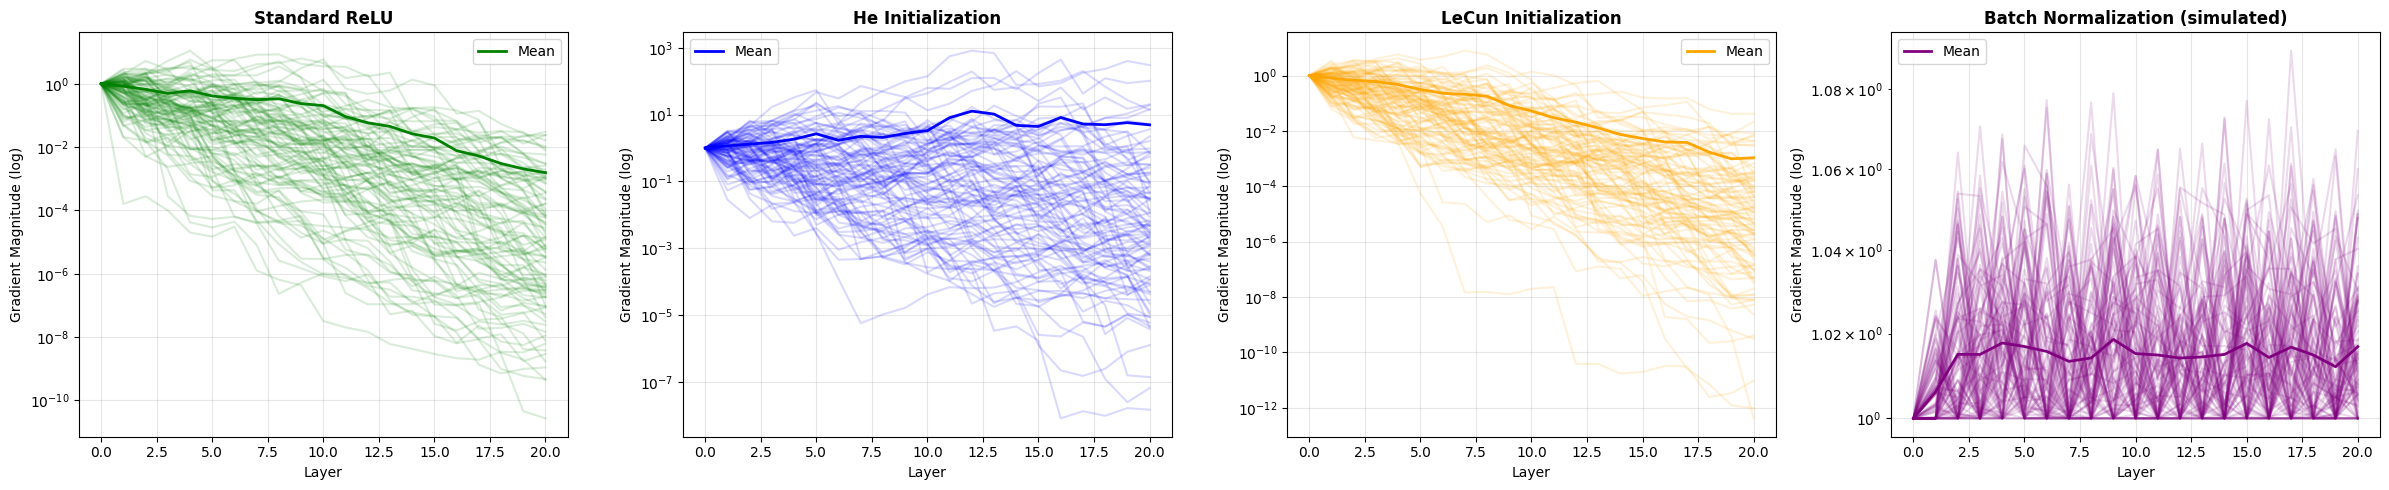

In [ ]:
# Monte Carlo simulation: Gradient flow with various initialization and normalization strategies (ReLU only)
import numpy as np
import matplotlib.pyplot as plt

n_layers = 20
n_sim = 100
layers = list(range(n_layers + 1))

all_relu = []
all_he = []
all_lecun = []
all_bn = []

for _ in range(n_sim):
    # 1. Standard ReLU (baseline, normal weights)
    grads_relu = []
    gradient = 1.0
    for i in range(n_layers + 1):
        weight = np.random.randn() * 1.0
        gradient = gradient * 1.0 * weight if i > 0 else gradient
        grads_relu.append(abs(gradient))
    all_relu.append(grads_relu)

    # 2. He Initialization (np.sqrt(2 / fan_in))
    grads_he = []
    gradient = 1.0
    he_scale = np.sqrt(2.0)
    for i in range(n_layers + 1):
        weight = np.random.randn() * he_scale
        gradient = gradient * 1.0 * weight if i > 0 else gradient
        grads_he.append(abs(gradient))
    all_he.append(grads_he)

    # 3. LeCun Initialization (np.sqrt(1 / fan_in))
    grads_lecun = []
    gradient = 1.0
    lecun_scale = 1.0
    for i in range(n_layers + 1):
        weight = np.random.randn() * lecun_scale
        gradient = gradient * 1.0 * weight if i > 0 else gradient
        grads_lecun.append(abs(gradient))
    all_lecun.append(grads_lecun)

    # 4. Batch Normalization (realistic, minibatch)
    batch_size = 32
    gradients = np.ones(batch_size)
    grads_bn = [np.mean(np.abs(gradients))]
    for i in range(n_layers):
        weights = np.random.randn(batch_size) * 1.0
        gradients = gradients * weights
        mean = np.mean(gradients)
        std = np.std(gradients) + 1e-6
        gradients = (gradients - mean) / std * 0.5 + 1.0
        grads_bn.append(np.mean(np.abs(gradients)))
    all_bn.append(grads_bn)

# Convert to arrays
all_relu = np.array(all_relu)
all_he = np.array(all_he)
all_lecun = np.array(all_lecun)
all_bn = np.array(all_bn)

fig, axes = plt.subplots(1, 4, figsize=(24, 5))

titles = [
    'Standard ReLU',
    'He Initialization',
    'LeCun Initialization',
    'Batch Normalization (simulated)'
]
colors = ['green', 'blue', 'orange', 'purple']
all_methods = [all_relu, all_he, all_lecun, all_bn]

for idx, (arr, title, color) in enumerate(zip(all_methods, titles, colors)):
    for i in range(n_sim):
        axes[idx].plot(layers, arr[i], color=color, alpha=0.15)
    axes[idx].plot(layers, np.mean(arr, axis=0), color=color, linewidth=2, label='Mean')
    axes[idx].set_yscale('log')
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Layer')
    axes[idx].set_ylabel('Gradient Magnitude (log)')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

plt.tight_layout()
plt.show()